## Email Spam Detection

### Import Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix


### Loading Dataset

In [3]:
spam = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [4]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
spam.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3438,ham,"awesome, how do I deal with the gate? Charles ...",NaN,NaN,NaN


### Data Cleaning

In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
spam.shape

(5572, 5)

In [9]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

#### Droping Columns

In [10]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
spam.sample(5)

,v1,v2
5440,ham,Thank you. do you generally date the brothas?
538,ham,Ummmmmaah Many many happy returns of d day my ...
170,ham,"Sir, I need AXIS BANK account no and bank addr..."
4221,ham,Yo you around? A friend of mine's lookin to pi...
3400,ham,Thanks honey. Have a great day.


In [12]:
# renaming the columns
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam.sample(5)

,target,text
4058,spam,Moby Pub Quiz.Win a å£100 High Street prize if...
3350,ham,At what time are you coming.
1721,ham,Am watching house ÛÒ very entertaining ÛÒ am...
5420,ham,I dont know oh. Hopefully this month.
850,ham,U reach orchard already? U wan 2 go buy ticket...


In [13]:
spam['target'] = spam.target.map({'ham': 0, 'spam': 1})

In [14]:
spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
spam.shape

(5572, 2)

In [16]:
## Checking Null Values
spam.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
## Checking duplicate values
spam.duplicated().sum()

403

In [18]:
## Remove duplicates
spam = spam.drop_duplicates(keep='first')

spam.duplicated().sum()

0

In [19]:
spam.shape

(5169, 2)

In [20]:
spam.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### EDA

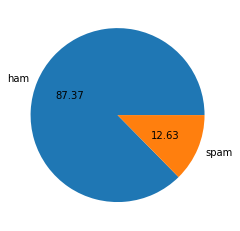

In [21]:
import matplotlib.pyplot as plt
plt.pie(spam['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalanced
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
spam['num_char'] = spam['text'].apply(len)

In [24]:
spam.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
spam.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
spam['num_sentences'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
spam.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
spam[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# Email ham
spam[spam['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# Email spam
spam[spam['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
spam.corr()

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_char,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

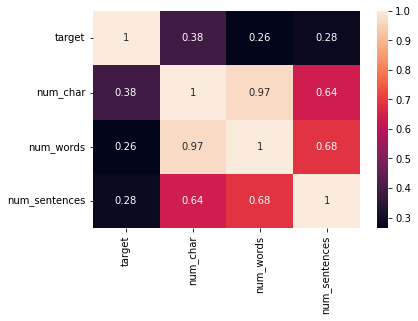

In [33]:
sns.heatmap(spam.corr(),annot=True)

### Data Preprocessing

 - Change all words into lower case
 - Tokenization
 - Removing special characters
 - Removing stop words and punctuation
 - Stemming

In [34]:
ps = PorterStemmer()

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
spam['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
spam['transformed_text'] = spam['text'].apply(transform_text)

In [40]:
spam.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(spam[spam['target'] == 1]['transformed_text'].str.cat(sep=" "))

### Model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(spam['transformed_text']).toarray()

In [45]:
X.shape

(5169, 3000)

In [46]:
y = spam['target'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Naive Bayes

In [48]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [49]:
prediction = model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test, prediction)
f1  = f1_score(y_test,prediction)
confusion_mat = confusion_matrix(y_test, prediction)
print('Accuracy:', accuracy)
print('Precision score', precision)
print('Recall score', recall)
print('F1 score', f1)
print('Confusion matrix:', confusion_mat)

Accuracy: 0.9722759509993553
Precision score 0.9939024390243902
Recall score 0.7951219512195122
F1 score 0.8834688346883469
Confusion matrix: [[1345    1]
 [  42  163]]


In [51]:
# Calculate the error rate
error_rate = 1 - accuracy
print('Error rate:', error_rate)

Error rate: 0.027724049000644735


In [52]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1346
           1       0.99      0.80      0.88       205

    accuracy                           0.97      1551
   macro avg       0.98      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551



### Logistic Regression

In [53]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
prediction = model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test, prediction)
f1  = f1_score(y_test,prediction)
confusion_mat = confusion_matrix(y_test, prediction)
print('Accuracy:', accuracy)
print('Precision score', precision)
print('Recall score', recall)
print('F1 score', f1)
print('Confusion matrix:', confusion_mat)

Accuracy: 0.9471308833010961
Precision score 0.9694656488549618
Recall score 0.6195121951219512
F1 score 0.7559523809523809
Confusion matrix: [[1342    4]
 [  78  127]]


In [56]:
# Calculate the error rate
error_rate = 1 - accuracy
print('Error rate:', error_rate)

Error rate: 0.05286911669890393


In [57]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1346
           1       0.97      0.62      0.76       205

    accuracy                           0.95      1551
   macro avg       0.96      0.81      0.86      1551
weighted avg       0.95      0.95      0.94      1551

